In [1]:
import ramanchada2 as rc2
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
import lmfit
import pandas as pd
from scipy import fft, signal, optimize
from scipy.sparse import diags
def plt_fig_ax(nrows=1, ncols=1, figsize=(20,5), **kwargs):
    return plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, **kwargs)

In [2]:
PST = {620.9: 16, 795.8: 10, 1001.4: 100, 1031.8: 27, 1155.3: 13, 1450.5: 8, 1583.1: 12, 1602.3: 28, 2852.4: 9, 2904.5: 13, 3054.3: 32}
NEON_NIST = {200.7009: 80, 202.55599999999998: 80, 208.54659999999998: 150, 209.61060000000003: 200, 209.6248: 120, 256.2123: 80, 256.7121: 90, 262.3107: 80, 262.98850000000004: 80, 263.6069: 90, 263.82890000000003: 80, 264.40970000000004: 80, 276.2921: 80, 279.20189999999997: 90, 279.4221: 80, 280.9485: 100, 290.6592: 80, 290.6816: 80, 291.0061: 90, 291.0408: 90, 291.11379999999997: 80, 291.5122: 80, 292.5618: 80, 293.2103: 80, 294.0653: 80, 294.6044: 90, 295.5725: 150, 296.3236: 150, 296.71840000000003: 150, 297.2997: 100, 297.47189: 30, 297.9461: 100, 298.26696000000004: 30, 300.1668: 150, 301.7311: 120, 302.7016: 300, 302.8864: 300, 303.07869999999997: 100, 303.4461: 120, 303.59229999999997: 100, 303.772: 100, 303.9586: 100, 304.40880000000004: 100, 304.5556: 100, 304.7556: 120, 305.43449999999996: 100, 305.46770000000004: 100, 305.73906999999997: 30, 305.91060000000004: 100, 306.2491: 100, 306.3301: 100, 307.0887: 100, 307.1529: 100, 307.5731: 100, 308.8166: 120, 309.2092: 100, 309.2901: 120, 309.4006: 100, 309.51030000000003: 100, 309.7131: 100, 311.798: 100, 311.816: 120, 314.1332: 300, 314.3721: 100, 314.8681: 100, 316.4429: 100, 316.5648: 100, 318.8743: 100, 319.4579: 120, 319.85859999999997: 500, 320.8965: 60, 320.9356: 120, 321.37350000000004: 120, 321.4329: 150, 321.8193: 150, 322.4818: 120, 322.9573: 120, 323.007: 200, 323.0419: 120, 323.2022: 120, 323.2372: 150, 324.3396: 100, 324.4095: 100, 324.8345: 100, 325.0355: 100, 329.7726: 150, 330.974: 150, 331.97220000000004: 300, 332.3745: 1000, 332.71529999999996: 150, 332.9158: 100, 333.48359999999997: 200, 334.4395: 150, 334.5453: 300, 334.5829: 150, 335.5016: 200, 335.78200000000004: 120, 336.0597: 200, 336.2161: 120, 336.2707: 100, 336.7218: 120, 336.98076000000003: 50, 336.99072: 70, 337.1799: 100, 337.8216: 500, 338.8417: 150, 338.8945: 120, 339.27979999999997: 300, 340.48220000000003: 100, 340.6947: 120, 341.3148: 100, 341.69140000000004: 120, 341.7688: 120, 341.79031: 50, 341.80055000000004: 5, 342.8687: 120, 344.77024: 20, 345.41944: 10, 345.661: 100, 345.9321: 100, 346.05237: 10, 346.43382: 10, 346.65781000000004: 20, 347.25706: 50, 347.95189999999997: 150, 348.0718: 200, 348.1933: 200, 349.80636: 10, 350.12159: 20, 351.51902: 20, 352.04711000000003: 100, 354.28470000000004: 120, 355.78049999999996: 120, 356.1198: 100, 356.8502: 250, 357.4181: 100, 357.4612: 200, 359.35257: 50, 359.36388999999997: 30, 360.01685000000003: 10, 363.3664: 10, 364.3927: 150, 366.40729999999996: 200, 368.22420999999997: 10, 368.57352000000003: 10, 369.42130000000003: 200, 370.12244: 4, 370.9622: 150, 371.3079: 250, 372.7107: 250, 376.6259: 800, 377.7133: 1000, 381.84270000000004: 100, 382.9749: 120, 421.9745: 150, 423.38500000000005: 100, 425.0649: 120, 436.9862: 120, 437.93999999999994: 70, 437.95500000000004: 150, 438.5059: 100, 439.1991: 200, 439.799: 150, 440.9299: 150, 441.3215: 100, 442.13890000000004: 100, 442.85159999999996: 100, 442.8634: 100, 443.09040000000005: 150, 443.0942: 150, 445.7049: 120, 452.27200000000005: 100, 453.77545: 100, 456.90569999999997: 100, 470.43949000000003: 150, 470.88594: 120, 471.00649999999996: 100, 471.20633: 150, 471.5344: 150, 475.2732: 50, 478.89258: 100, 479.02195: 50, 482.7338: 100, 488.49170000000004: 100, 500.51587: 50, 503.77511999999996: 50, 514.49384: 50, 533.07775: 60, 534.10938: 100, 534.32834: 60, 540.05618: 200, 556.27662: 50, 565.66588: 50, 571.92248: 50, 574.82985: 50, 576.4418800000001: 70, 580.44496: 50, 582.01558: 50, 585.24879: 200, 587.2827500000001: 50, 588.18952: 100, 590.24623: 5, 590.64294: 5, 594.48342: 50, 596.5471: 50, 597.46273: 50, 597.5534: 60, 598.79074: 15, 602.99969: 100, 607.43377: 100, 609.61631: 30, 612.8449899999999: 10, 614.3062600000001: 100, 616.35939: 100, 618.2146: 15, 621.72812: 100, 626.6495: 100, 630.47889: 10, 632.81646: 30, 633.4427800000001: 100, 638.29917: 100, 640.2248: 200, 650.65281: 150, 653.28822: 10, 659.89529: 100, 665.2092700000001: 15, 667.82762: 50, 671.7043: 7, 692.94673: 1000, 702.40504: 300, 703.24131: 800, 705.12923: 20, 705.91074: 100, 717.39381: 800, 721.3199999999999: 150, 723.5188: 150, 724.51666: 800, 734.3945: 150, 747.24386: 30, 748.88712: 300, 749.2102: 100, 752.2818: 150, 753.57741: 300, 754.4044299999999: 130, 772.4623300000001: 1, 774.0738: 120, 783.9052899999999: 2, 792.6201: 120, 792.71177: 3, 793.69961: 13, 794.3181400000001: 80, 808.2457999999999: 60, 808.4345000000001: 100, 811.85492: 40, 812.89108: 12, 813.64054: 170, 825.9379000000001: 30, 826.4807000000001: 100, 826.60772: 70, 826.71162: 10, 830.03258: 300, 831.4995000000001: 100, 836.57466: 50, 837.2106: 100, 837.7608: 800, 841.71606: 30, 841.84274: 250, 846.33575: 40, 848.44435: 13, 849.53598: 700, 854.46958: 15, 857.13524: 30, 859.12584: 400, 863.4647000000001: 350, 864.70411: 60, 865.4383099999999: 600, 865.5522000000001: 80, 866.8255999999999: 100, 867.94925: 130, 868.19211: 150, 870.41116: 30, 877.1656300000001: 100, 878.06226: 600, 878.3753300000001: 400, 883.0907199999999: 6, 885.38668: 300, 886.53063: 20, 886.57552: 150, 891.9500599999999: 60, 898.85564: 20, 907.9462: 100, 914.86716: 120, 920.1759099999999: 90, 922.0060100000001: 60, 922.1580099999999: 20, 922.66903: 20, 927.55196: 9, 928.7563: 200, 930.0852699999999: 80, 931.0583899999999: 8, 931.39726: 30, 932.65068: 70, 937.33078: 15, 942.5378800000001: 50, 945.9209500000001: 30, 948.66818: 50, 953.4162899999999: 60, 954.7404899999999: 30, 957.7013000000001: 120, 966.54197: 180, 980.8860000000001: 100, 1029.5417400000001: 4, 1056.24075: 80, 1079.80429: 60, 1084.44772: 90, 1114.3020000000001: 300, 1117.7523999999999: 500, 1139.04339: 150, 1140.91343: 90, 1152.27459: 300, 1152.5019399999999: 150, 1153.63445: 90, 1160.15366: 30, 1161.40807: 130, 1168.80017: 30, 1176.67924: 150, 1178.90435: 130, 1178.98891: 30, 1198.4912: 70, 1206.6334000000002: 200, 1245.9388999999999: 40, 1268.9200999999998: 60, 1291.2014: 80, 1321.9241: 40, 1523.0714: 50, 1716.1929: 20, 1803.5812: 20, 1808.3181: 40, 1808.3263: 9, 1822.1087: 15, 1822.7015999999999: 13, 1827.6642: 140, 1828.2614: 100, 1830.3967: 70, 1835.9094: 20, 1838.4826: 60, 1838.9937000000002: 90, 1840.2836: 40, 1842.2401999999997: 60, 1845.864: 13, 1847.58: 40, 1859.1541000000002: 70, 1859.7698: 100, 1861.8908: 16, 1862.5158999999999: 20, 2104.127: 30, 2170.811: 30, 2224.736: 13, 2242.814: 13, 2253.038: 80, 2266.179: 13, 2310.048: 25, 2326.027: 40, 2337.296: 50, 2356.5330000000004: 30, 2363.648: 170, 2370.166: 12, 2370.913: 60, 2395.1400000000003: 110, 2395.643: 50, 2397.816: 60, 2409.857: 11, 2416.143: 20, 2424.9610000000002: 30, 2436.5009999999997: 70, 2437.161: 40, 2444.786: 20, 2445.939: 30, 2477.6490000000003: 17, 2492.889: 30, 2516.17: 13, 2552.433: 50, 2838.62: 6, 3020.049: 6, 3317.3089999999997: 8, 3335.238: 17, 3389.9809999999998: 5, 3390.3019999999997: 4, 3391.31: 12, 3413.1339999999996: 4, 3447.143: 6, 3583.4809999999998: 8}


<AxesSubplot: >

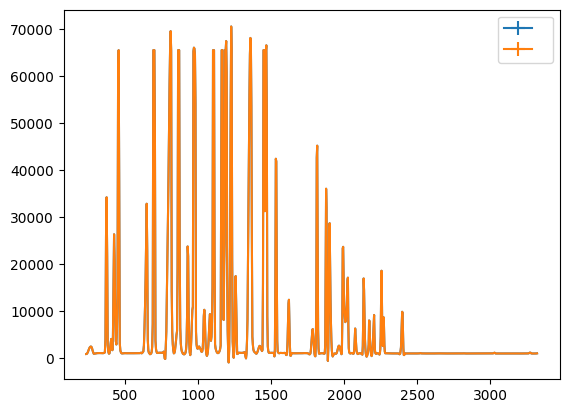

In [5]:
spe = rc2.spectrum.from_local_file('/data/RamanSpe/FNMT-Madrid/Horiba_785nm/Ne Box/NeonSNQ043_iR785_OP01.txt')
fig, ax = plt.subplots()
spe.plot(ax=ax)
ape = spe.subtract_moving_minimum(50)
spe.plot(ax=ax)


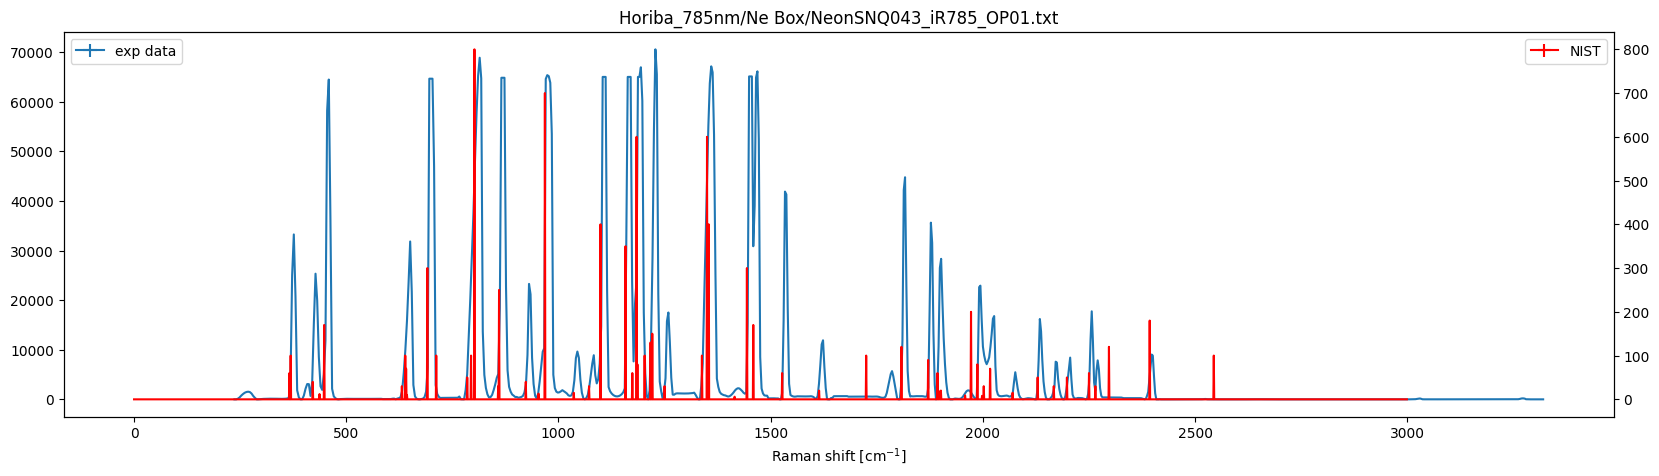

In [7]:
fig, ax = plt_fig_ax()


neon_deltas_wn785 = rc2.misc.utils.abs_nm_to_shift_cm_1_dict(NEON_NIST, 785)
neon_deltas_wn785 = {k: v for k, v in neon_deltas_wn785.items() if k>200 and k< 3000}
ax1 = ax.twinx()
neon_deltas_wn785_spe = rc2.spectrum.from_delta_lines(neon_deltas_wn785, xcal=lambda x: x, nbins=3000)
neon_deltas_wn785_spe.plot(ax=ax1, label='NIST', fmt='r')

spe = rc2.spectrum.from_local_file('/data/RamanSpe/FNMT-Madrid/Horiba_785nm/Ne Box/NeonSNQ043_iR785_OP01.txt').subtract_moving_minimum(50)
spe.plot(ax=ax, label='exp data')
ax.set_xlabel(r'Raman shift [$\mathrm{cm}^{-1}$]')
ax.legend(loc='upper left')
ax1.legend(loc='upper right')
ax.set_title('Horiba_785nm/Ne Box/NeonSNQ043_iR785_OP01.txt')
None

# Decalibrate

Text(0.5, 0, 'Raman shift [a.u.]')

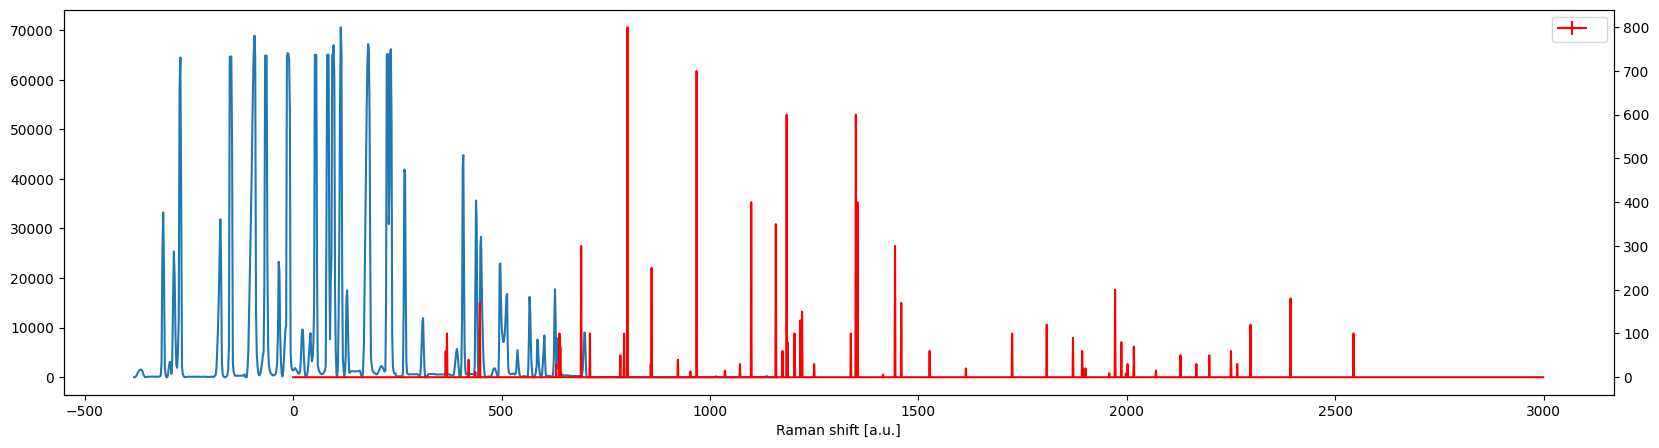

In [8]:
spe_uncal = spe.scale_xaxis_fun(lambda x: x*.5-500)

fig, ax = plt_fig_ax()
ax.plot(spe_uncal.x, spe_uncal.y)
neon_deltas_wn785_spe.plot(ax=ax.twinx(), fmt='r')
ax.set_xlabel('Raman shift [a.u.]')


# Initial guess
Based on the 10-th and 90-th percentiles

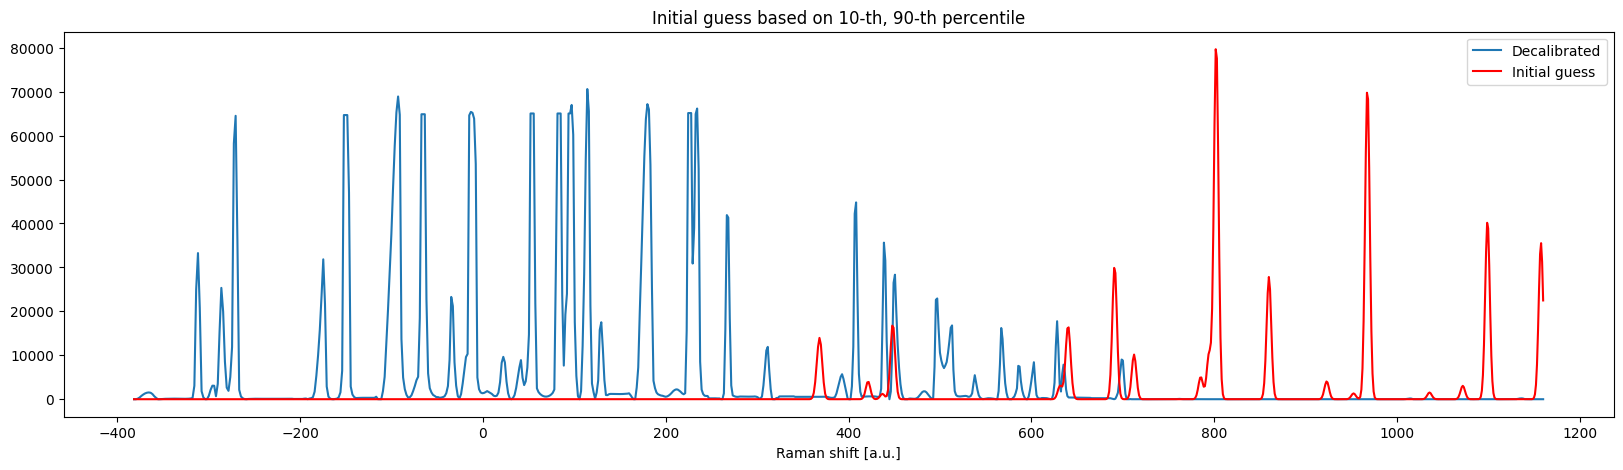

In [10]:
mod, par = spe_uncal.calibrate_by_deltas_model(neon_deltas_wn785, convolution_steps=None, scale2=False, scale3=False)

fig, ax = plt_fig_ax()
ax.plot(spe_uncal.x, spe_uncal.y, label='Decalibrated')
ax.plot(spe_uncal.x, mod.eval(params=par, x=spe_uncal.x), 'r', label='Initial guess')
ax.set_title('Initial guess based on 10-th, 90-th percentile')
ax.set_xlabel('Raman shift [a.u.]')
ax.legend()


# Recalibrate

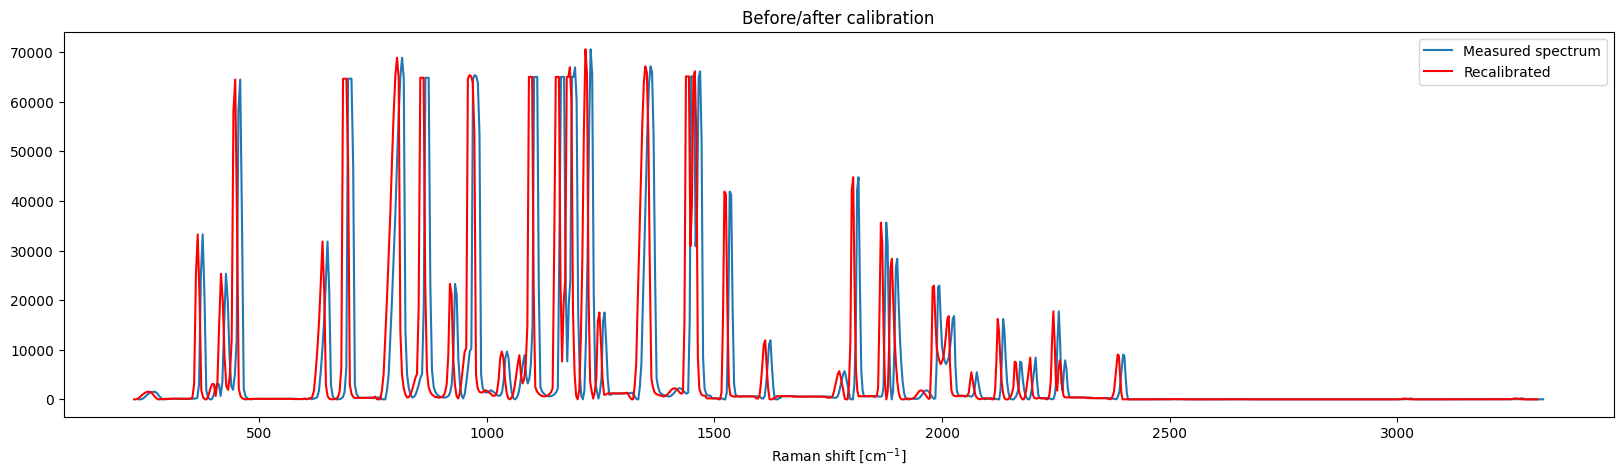

In [11]:
spe_recal = spe_uncal.calibrate_by_deltas_filter(neon_deltas_wn785, convolution_steps=[100, 15, 3], scale2=False, scale3=True)

fig, ax = plt_fig_ax()
ax.plot(spe.x, spe.y, label='Measured spectrum')
ax.plot(spe_recal.x, spe_recal.y, 'r', label='Recalibrated')
ax.set_xlabel('Raman shift $[\mathrm{cm}^{-1}]$')
ax.set_title('Before/after calibration')
ax.legend()
